__**Environmental Data Example - Global Earthquake Data Visualisation**__

This code will give an example of how environmental data can be extracted an analysed from a dataset and will show a breakdown of some of the useful techniques/codes for the visualisation of data - Using data gathered from The National Earthquake Information Center (NEIC).

__**Initial Conditions/Setting Up Of The Dataset**__

In [1]:
# Imports data analysis libraries, (numpy for numerical computations and pandas to read the dataset/.csv files)

import numpy as np 
import pandas as pd

In [2]:
# Imports visualisation libraries, (matplot.lib and seaborn for graphical and statistical analysis )

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
from mpl_toolkits.basemap import Basemap
%config InlineBackend.figure_format = 'retina'

In [3]:
# Allows warnings to be ignored 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Imports the data for global temperatures by country 

earthquakedata = pd.read_csv("database.csv")

In [5]:
# Shows the whole dataset

earthquakedata

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [6]:
# Gives a list of all the different column headings/variables within the dataset
earthquakedata.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [7]:
# Shows an example of 5 rows within the whole dataset

earthquakedata.sample(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
1054,09/16/1968,13:55:35,-6.024,148.758,Earthquake,35.0,NaN,NaN,6.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM817073,ISCGEM,ISCGEM,ISCGEM,Automatic
19714,10/09/2009,22:49:54,-9.027,157.959,Earthquake,10.0,NaN,256.0,5.6,MWB,...,NaN,18.1,NaN,NaN,1.11,USP000H2P8,US,US,US,Reviewed
7786,12/02/1985,07:14:37,41.158,139.806,Earthquake,21.9,NaN,NaN,5.5,MW,...,NaN,NaN,NaN,NaN,1.00,USP0002NFT,US,US,HRV,Reviewed
1426,11/11/1969,15:23:59,-5.765,151.541,Earthquake,65.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM802172,ISCGEM,ISCGEM,ISCGEM,Automatic
4927,09/01/1978,07:14:49,-30.682,-178.017,Earthquake,17.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000WAB,US,US,US,Reviewed


In [8]:
# Shows a summary/additional information for the dataset 

earthquakedata.describe(include="all")

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
count,23412,23412,23412.000000,23412.000000,23412,23412.000000,4461.000000,7097.000000,23412.000000,23409,...,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,23412,23412,23412,23412,23412
unique,12401,20472,NaN,NaN,4,NaN,NaN,NaN,NaN,10,...,NaN,NaN,NaN,NaN,NaN,23412,13,48,24,2
top,03/11/2011,02:56:58,NaN,NaN,Earthquake,NaN,NaN,NaN,NaN,MW,...,NaN,NaN,NaN,NaN,NaN,USC000MYQQ,US,US,US,Reviewed
freq,128,5,NaN,NaN,23232,NaN,NaN,NaN,NaN,7722,...,NaN,NaN,NaN,NaN,NaN,1,20630,20350,10458,20773
mean,NaN,NaN,1.679033,39.639961,NaN,70.767911,4.993115,275.364098,5.882531,NaN,...,48.944618,44.163532,3.992660,7.662759,1.022784,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,30.113183,125.511959,NaN,122.651898,4.875184,162.141631,0.423066,NaN,...,62.943106,32.141486,5.377262,10.430396,0.188545,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-77.080000,-179.997000,NaN,-1.100000,0.000000,0.000000,5.500000,NaN,...,0.000000,0.000000,0.004505,0.085000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,-18.653000,-76.349750,NaN,14.522500,1.800000,146.000000,5.600000,NaN,...,10.000000,24.100000,0.968750,5.300000,0.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,-3.568500,103.982000,NaN,33.000000,3.500000,255.000000,5.700000,NaN,...,28.000000,36.000000,2.319500,6.700000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,26.190750,145.026250,NaN,54.000000,6.300000,384.000000,6.000000,NaN,...,66.000000,54.000000,4.724500,8.100000,1.130000,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checks for any unusable values within the dataset (Useful when trying to formulate graphical results)

nullcolumns = earthquakedata.columns[earthquakedata.isnull().any()] # Renames the variables/null columns within the dataset 

earthquakedata.isnull().sum() # Shows the amount of missing and unusable values within the dataset

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

Although there are some missing fields within the columns there is no need to attempt to fill these gaps at this stage, as it will still provide an accurate representation of magnitude of earthquakes in respect to location; if further analysis was to be made using the dataset in relation to some of the variables with null values then we would attempt to fill these gaps.

In [10]:
# Returns all of the different magnitudes of earthquakes within the dataset 

earthquakedata.Magnitude.unique()

array([ 6.  ,  5.8 ,  6.2 ,  6.7 ,  5.9 ,  8.2 ,  5.5 ,  5.6 ,  6.1 ,
        8.7 ,  5.7 ,  7.3 ,  6.5 ,  6.4 ,  6.3 ,  7.  ,  7.4 ,  7.6 ,
        6.8 ,  7.7 ,  7.2 ,  7.8 ,  6.9 ,  6.6 ,  7.5 ,  7.1 ,  6.35,
        8.1 ,  5.62,  5.63,  7.9 ,  5.52,  5.82,  5.54,  8.  ,  5.64,
        5.55,  5.67,  5.84,  5.81,  6.47,  6.31,  5.75,  5.66,  5.51,
        6.45,  6.57,  5.77,  5.53,  5.69,  5.89,  5.58,  8.3 ,  5.94,
        8.4 ,  6.48,  5.97,  9.1 ,  8.6 ,  5.88,  8.8 ,  5.72,  6.02,  5.73])

In [11]:
# Returns the max, min and average magnitudes of the earthquakes within the dataset 

minmag = earthquakedata.Magnitude.min()
maxmag = earthquakedata.Magnitude.max()
avemag = earthquakedata.Magnitude.mean()

print("Minimum Magnitude:", minmag)
print("Maximum Magnitude:", maxmag)
print("Mean/Average Magnitude:", avemag)

Minimum Magnitude: 5.5
Maximum Magnitude: 9.1
Mean/Average Magnitude: 5.882530753460003


This shows the ranges of magnitudes recorded within the dataset as well as the maximum and minimum magnitudes which are 5.5 and 9.1 respectively. In addition to this it also shows that the mean/average magnitude of earthquakes globally are 5.88. However if we are to put these values to use we need to make some visualisations of this data, as shown below.

__**Part 1 - Visualisation of global locations of earthquakes and relative magnitudes**__

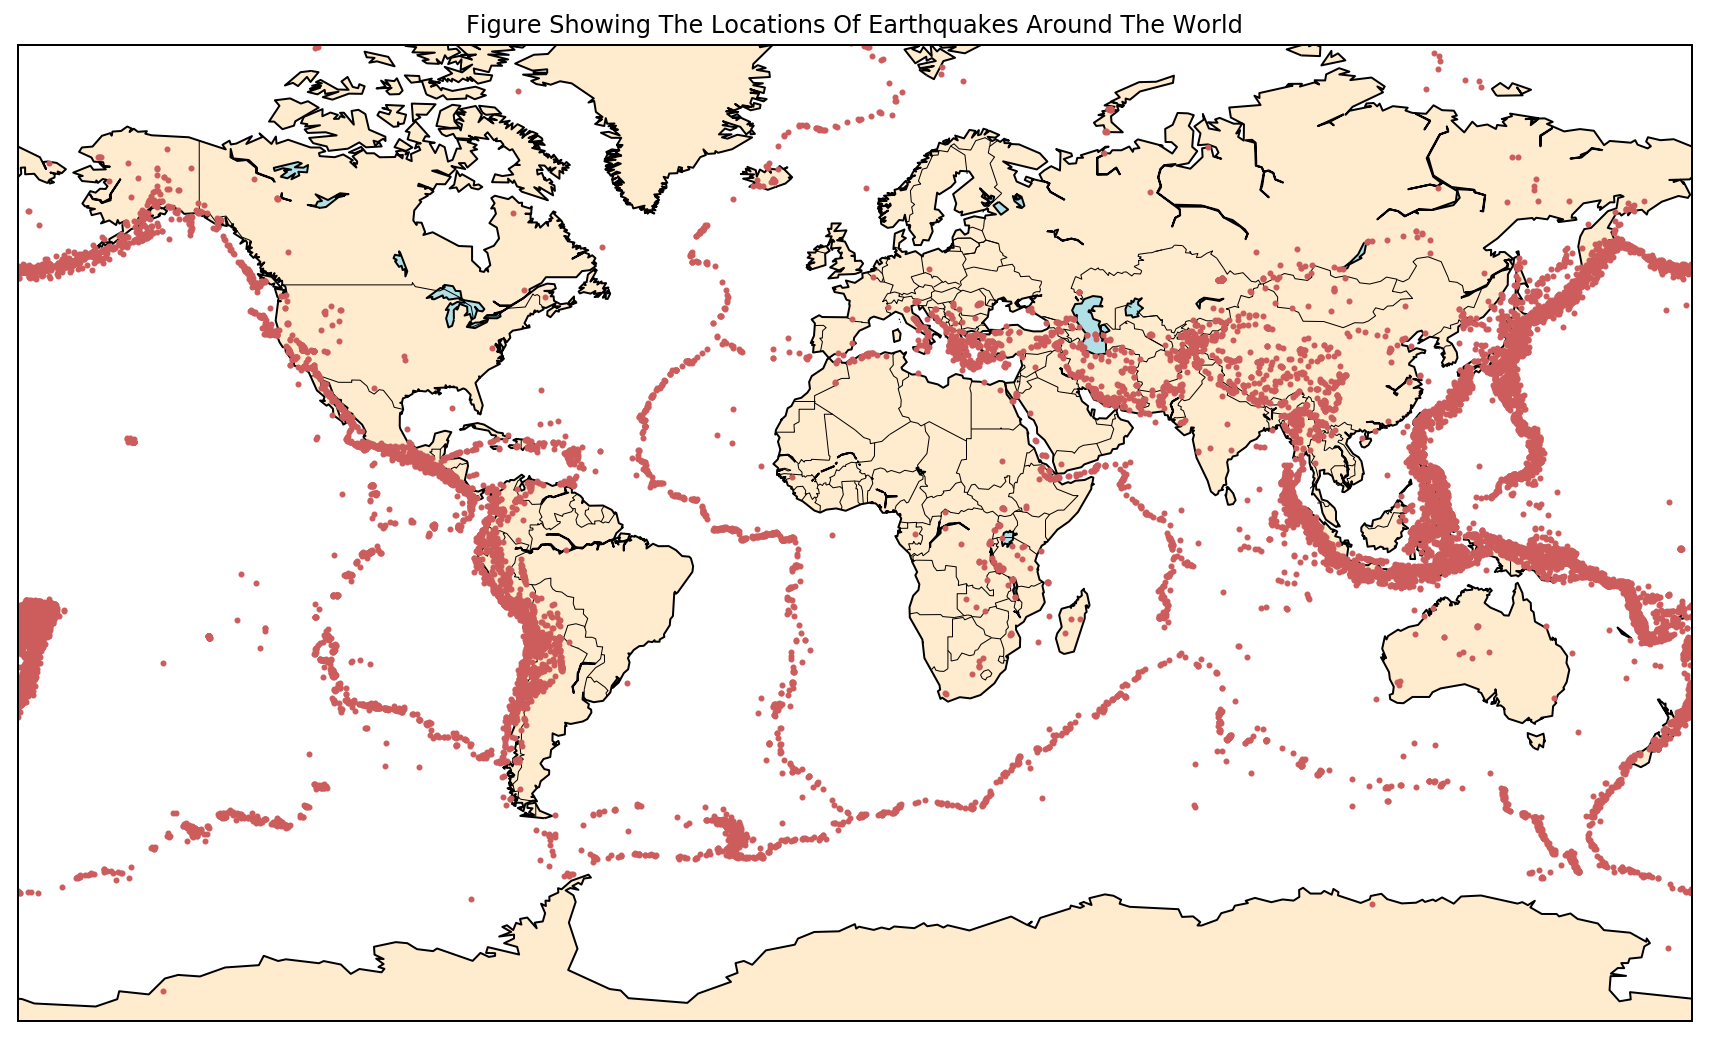

In [12]:
# This plots the locations of all of the earthquakes around the world (Using Basemap)


m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = earthquakedata["Longitude"].tolist()
latitudes = earthquakedata["Latitude"].tolist()
    
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(15,12))
plt.title("Figure Showing The Locations Of Earthquakes Around The World")
m.plot(x, y, "o", markersize = 2, color = 'indianred')
m.drawcoastlines()
m.fillcontinents(color='blanchedalmond',lake_color='powderblue')
m.drawmapboundary()
m.drawcountries()
plt.show()

As the map/visualisation shows, earthquakes occur over all parts of the world and tend to follow the lines of the tectonic plate boundaries; with higher densities of earthquakes occuring at the fault lines which are to be expected. To further improve on this visualisation we could further add a filter which would only display earthquakes of a certain magnitude or even to display different colours for different ranges of magnitude.

In [13]:
# This creates a new variable for earthquakes of a high magnitude and plots their locations to show highly affected areas

highmag = earthquakedata[earthquakedata['Magnitude']>=7]

print('Number Of Earthquakes With A Magnitude Greater Than Or Equal To 7:',highmag.Magnitude.count())

Number Of Earthquakes With A Magnitude Greater Than Or Equal To 7: 738


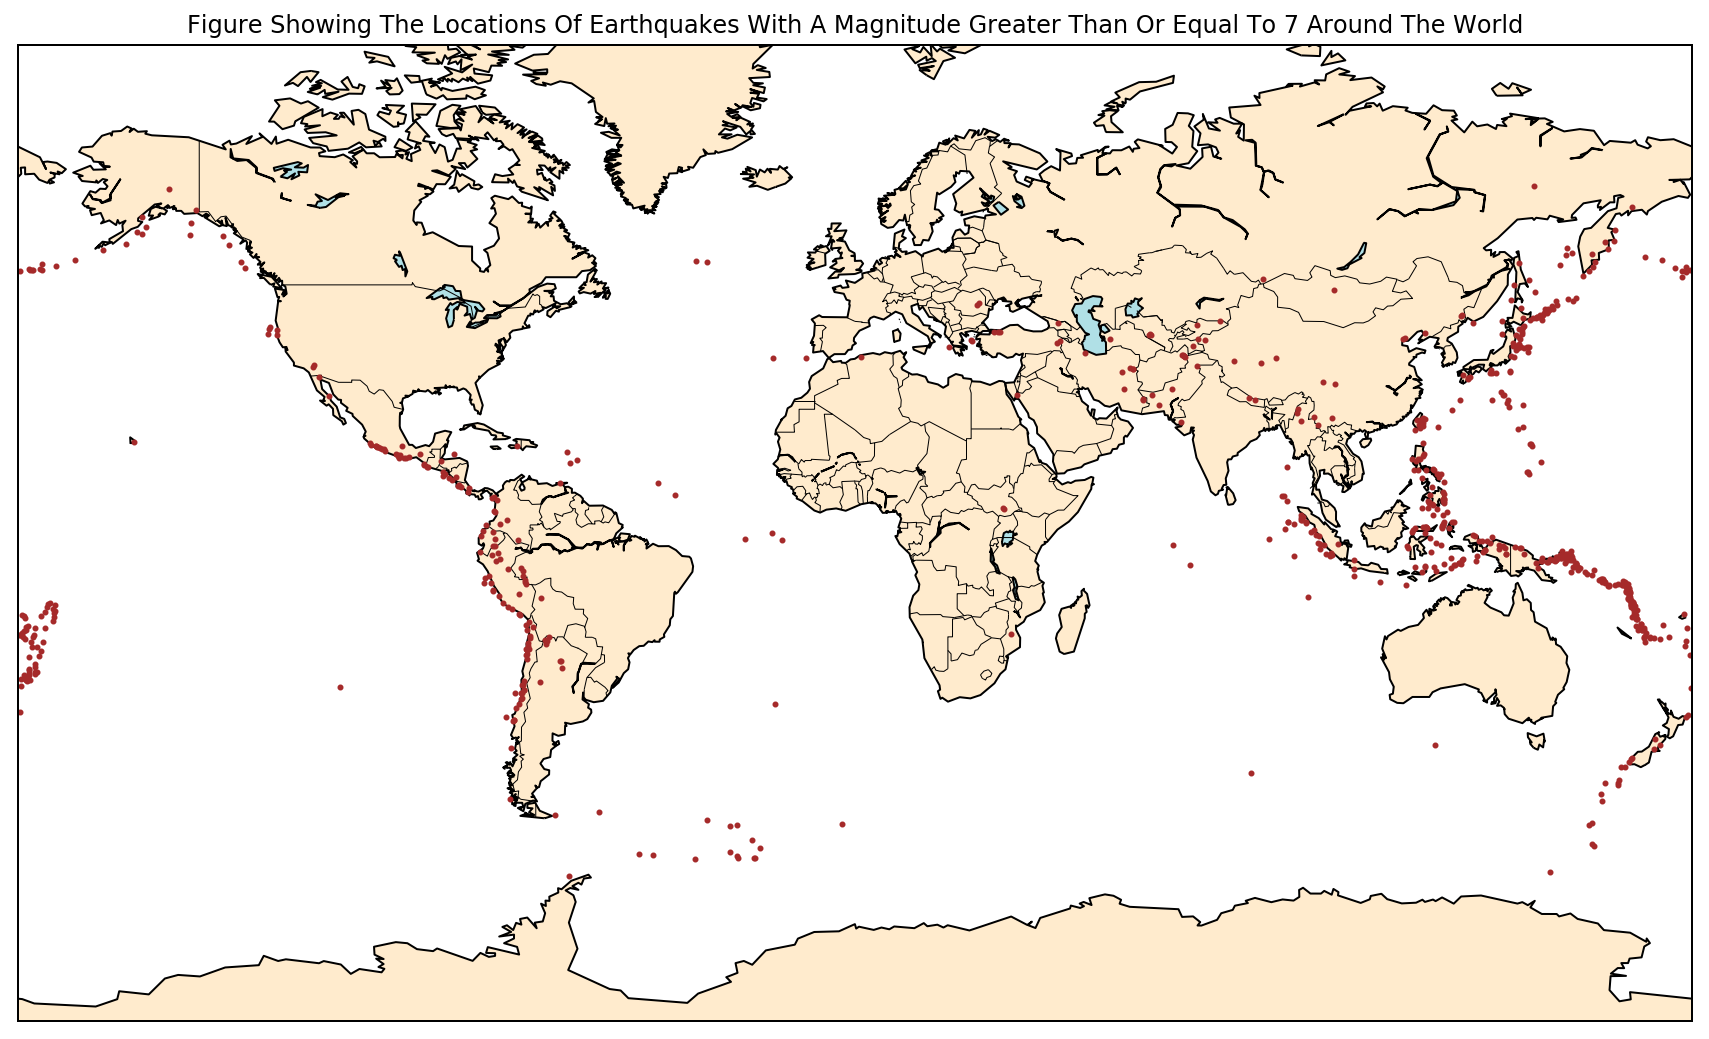

In [14]:
# This plots the locations of all of the earthquakes with a magnitude >=7 around the world (Using Basemap)


m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = highmag["Longitude"].tolist()
latitudes = highmag["Latitude"].tolist()
    
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(15,12))
plt.title("Figure Showing The Locations Of Earthquakes With A Magnitude Greater Than Or Equal To 7 Around The World")
m.plot(x, y, "o", markersize = 2, color = 'brown')
m.drawcoastlines()
m.fillcontinents(color='blanchedalmond',lake_color='powderblue')
m.drawmapboundary()
m.drawcountries()
plt.legend()
plt.show()

As the map/visualisation shows, there are significantly less earthquakes that occur with a magnitude of greater than or equal to 7. With majority of these values occuring within the Eastasia and Oceania regions. However this is a useful plot as these positions can potentially indicate areas that have been highly affected by earthquakes and more data could then be analysed in relation to the occurance and years that these happened against the GDP of the nations that these occured in. 

Next we can use a simple histogram to visualise the occurances of earthquakes within set ranges of magnitudes, and easily graphically represent for further analysis. 

Magnitude   Number of Occurrences
5-6         183.0
6-7         34.0
7-8         4.0
8-9         2.0
9-10         0.0


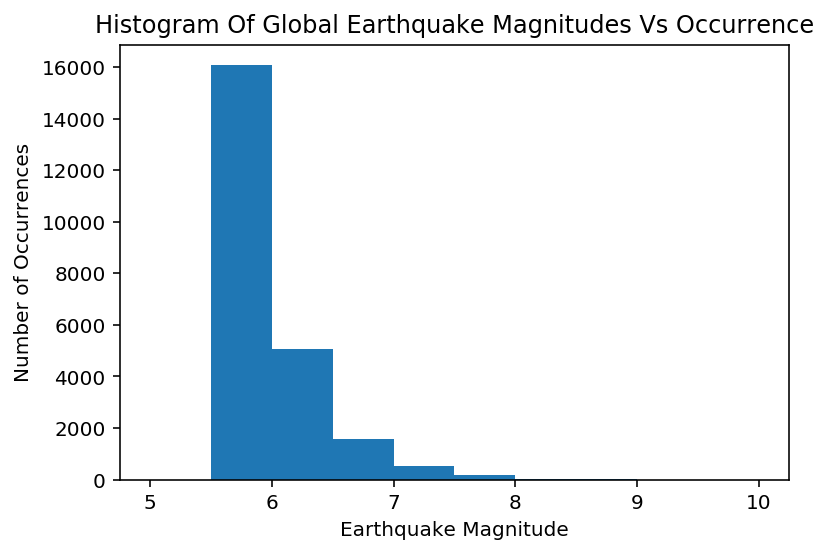

In [15]:
# This puts the data for magnitude into set groups/bins and then plots these in a histogram

(n,bins,patches) = plt.hist(earthquakedata["Magnitude"], range=(5,10), bins=10)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Number of Occurrences")
plt.title("Histogram Of Global Earthquake Magnitudes Vs Occurrence")

# Prints the number of occurances within each range of magnitudes of the earthquakes (It was chosen to show from a magnitude of 5 and above as the min magnitude was 5.5)

print("Magnitude" +"   "+ "Number of Occurrences")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

__**Part 2 - Visualisation of earthquakes in relation to time**__

In this part we will visualise the earthquake dataset in relation to time, in particular we will look at the number of earthquakes/occurances over time and see if the general trend is that of an increase, decrease or random over time; this will also include looking at the occurances globally over each month of a year and whether there is a particular time that more earthquakes occur. 

In [16]:
# Converts and extracts the month from the 'Date' column and adds this to a new column 'Month'

earthquakedata['Date'] = pd.to_datetime(earthquakedata['Date'])

earthquakedata['Month'] = earthquakedata['Date'].dt.month

In [17]:
# Calculates the monthly occurrence of earthquakes 

monthlyoccurrence = earthquakedata.groupby("Month").groups
print(len(monthlyoccurrence[1]))

month = [i for i in range(1,13)]
occurrence = []

for i in range(len(month)):
    val = monthlyoccurrence[month[i]]
    occurrence.append(len(val))
    
# Use as a check to make sure we are getting the correct sum of earthquakes in the dataset
    
print(occurrence)
print(sum(occurrence))

1891
[1891, 1829, 2114, 1971, 1964, 1824, 1880, 2014, 1985, 1952, 1987, 2001]
23412


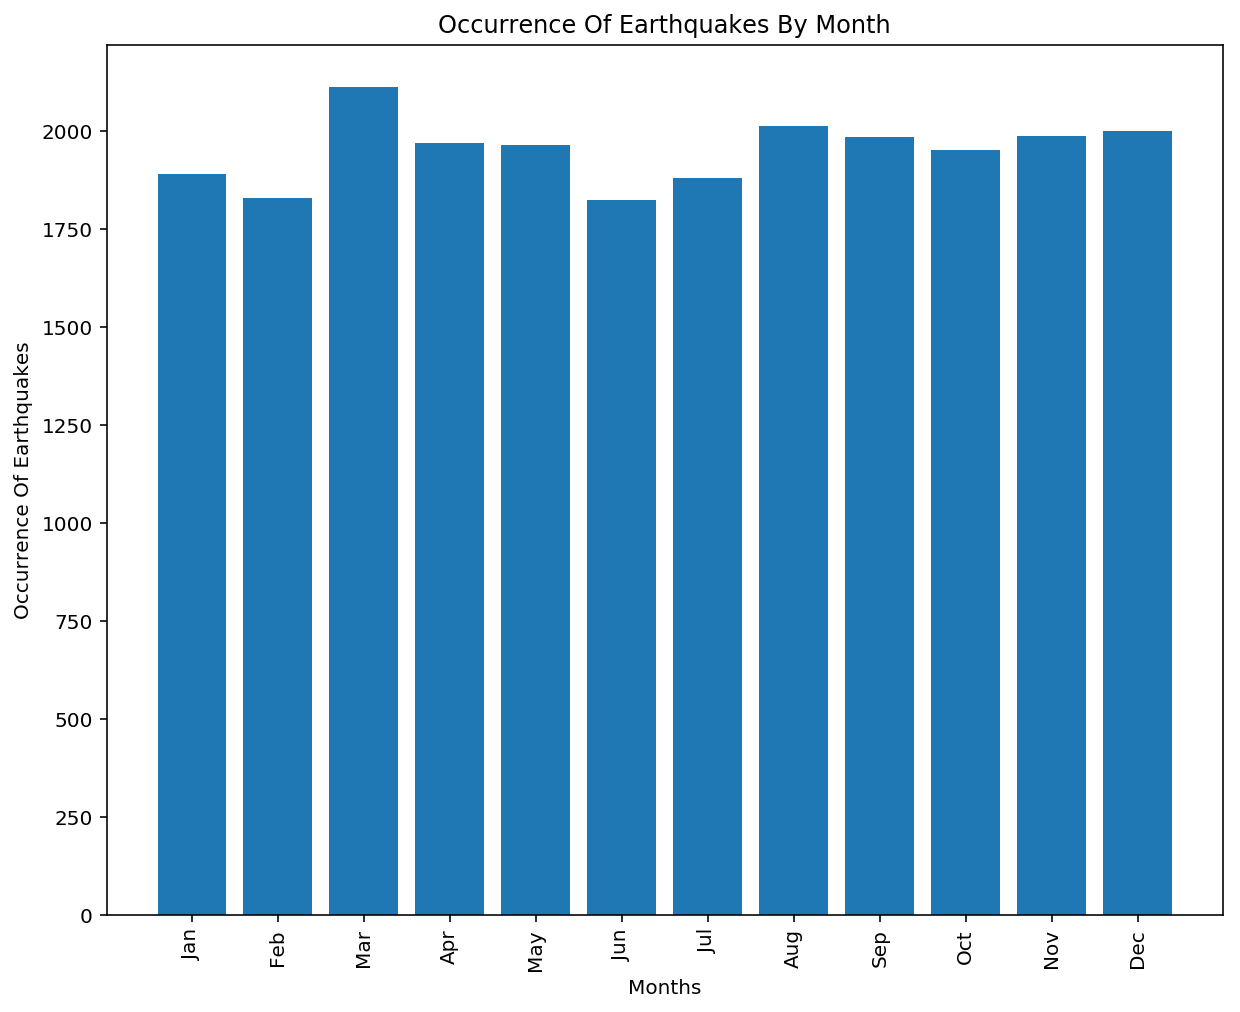

In [18]:
# Graphically visualises the occurance of earthquakes by month

fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12) + 1

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
num_cols = months
bar_heights = occurrence

ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
plt.title("Occurrence Of Earthquakes By Month")
plt.xlabel("Months")
plt.ylabel("Occurrence Of Earthquakes")
plt.show()

This bar chart is useful in showing the visualisation of earthquake occurrence per month, as you can see from the visual the month appears to play no role in the occurrence of earthquakes as there is almost no correlation; which we would expect as they are a random/natural occurrence.

In [19]:
# Converts and extracts the year from the 'Date' column 

earthquakedata['Year'] = earthquakedata['Date'].dt.year

In [20]:
# This calculates the occurrence of earthquakes by year 

yearlyoccurrence = earthquakedata.groupby("Year").groups

print('Range Of Years For Earthquake Occurrence:', earthquakedata.Year.values)

year = [i for i in range(1965,2017)]
occurrence = []

for i in range(len(year)):
    val = yearlyoccurrence[year[i]]
    occurrence.append(len(val))

# This returns the values for the max, min and average occurrence of earthquakes per year

print("Minimum:",np.min(occurrence))
print("Maximum:",np.max(occurrence))
print('Average:',np.mean(occurrence))

Range Of Years For Earthquake Occurrence: [1965 1965 1965 ..., 2016 2016 2016]
Minimum: 234
Maximum: 713
Average: 450.230769231


In [21]:
from scipy import stats

iqr = stats.iqr(occurrence)
upper = np.mean(occurrence) + iqr/2
lower = np.mean(occurrence) - iqr/2

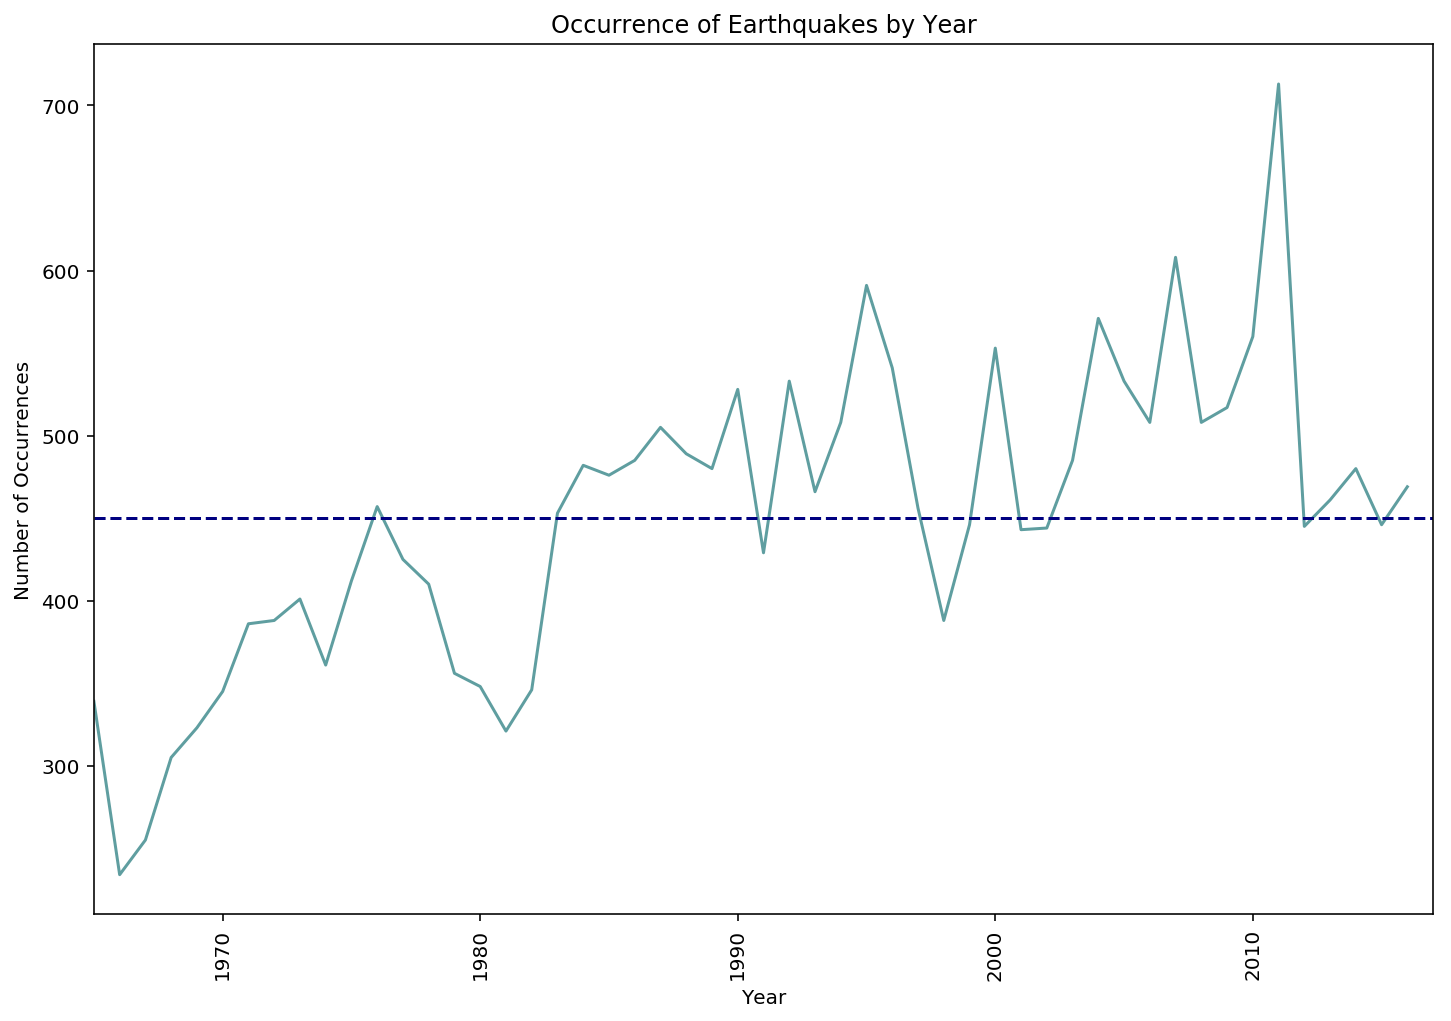

In [22]:

fig = plt.figure(figsize=(12,8))
plt.plot(year,occurrence,'cadetblue')
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.title("Occurrence of Earthquakes by Year")
plt.xlim(1965,2017)

# Plots a horizontal line with the average occurence of earthquakes yearly

plt.axhline(y=np.mean(occurrence),color='navy', linestyle='--')

plt.show()

This graph/visual is a good method to display the information for the occurrence of earthquakes over time. However with that being said the graphic is static and offers no display of values for the occurrence of each year, but it does allow the oppertunity to add a line showing the average occurrence of earthquakes globally which allows a direct comparison to be made for each year against the average; with further lines that could be added to display the iqr and the upper and lower limits. 

In [23]:
# Draws an interactive scattergraph to show the global occurance of earthquakes with time 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace0 = go.Scatter(
    x = year, 
    y = occurrence,
    name='Occurrence Of Earthquakes',
    line=dict(
        color='rgb(112, 138, 144)',
    )
)

data = [trace0]

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Occurrence Of Earthquakes'),
    title='Global Occurrence Of Earthquakes Over Time',
    showlegend = True)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

This graph/visual is a good method to display the information for the occurrence of earthquakes over time. As the interactive plot allows the oppertunity to display the values for the occurrence of earthquakes each year, however it does not show the line of average occurrence allowing a direct comparison each year against the average; this plot does however have further improvements that could be made, with the addition of further lines such as the average, iqr and upper/lower limits. 

__**Summary/Conclusion**__

In summary this shows some of the various visualisation techniques that can be made using this particular environmental dataset, however there are many more ways in which the data can be visualised and this depends on the variables given within the dataset and the types of outputs you are looking to achieve. More examples of codes and visualisation techniques can be found online or within the python help feature. 